## Workflow - Pass Map (Team)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
```

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

In [51]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `match_events.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_events.csv")
```

In [52]:
raw_data = pd.read_csv("data/match_events.csv")

**2.1 Data Prep** - make a copy of raw data to work on called `df`

```
df = raw_data.copy()
```

In [53]:
df = raw_data.copy()

**2.2 Data Prep** - use the `head()` function to check the first 5 rows of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [54]:
df.head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,NaN,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN


**2.3 Data Prep** - check the dimensions of the `df` (<no. of rows>, <no. of columns>). Should be (1854, 18).
```
df.shape
```

In [55]:
df.shape

(1854, 18)

**2.4 Data Load** - load the `emirates_pitch.png` graphic located in the `data` directory (folder) and store in a variable called `pitch`
```
pitch = Image.open("data/emirates_pitch.png")
```

In [56]:
pitch = Image.open("data/emirates_pitch.png")

**2.5 Data Prep** - check the `pitch` object using `imshow()` function available from the `matplotlib` plotting library
```
plt.imshow(pitch)
```

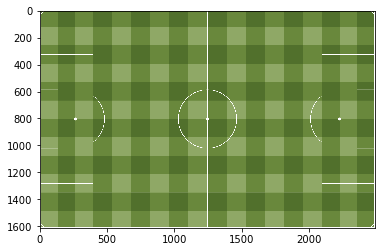

In [57]:
plt.imshow(pitch)

---
> ### 3. DATA ANALYSIS & VISUALISATION

**3.0 VIZ PREP** - create a new variable (object) called `pass_filter` that can be used to filter the `df` for just the `"completed_pass"` events
```
pass_filter = (df["event"] == "completed_pass")
```

In [58]:
pass_filter = (df["event"] == "completed_pass")

**3.1 VIZ PREP** - create a dataframe called `pass_df` that is a copy of the `df` filtered for just the `"completed_pass"` events using the `pass_filter`
```
pass_df = df[pass_filter].copy()
```

In [59]:
pass_df = df[pass_filter].copy()

**3.2 VIZ PREP** - check the dimensions of the new `pass_df` (<no. of rows>, <no. of columns>). Should be (791, 18).
```
pass_df.shape
```

In [60]:
pass_df.shape

(791, 18)

**3.3 VIZ PREP** - check what columns are in the `pass_df` in preparation for dropping unncessary ones
```
pass_df.columns
```

In [61]:
pass_df.columns

Index(['start_min', 'start_sec', 'end_min', 'end_sec', 'match_half', 'player1',
       'player1_team', 'player2', 'player2_team', 'event', 'press',
       'press_team', 'start_x', 'start_y', 'end_x', 'end_y', 'press_x',
       'press_y'],
      dtype='object')

**3.4 VIZ PREP** - use the `drop()` function to remove a selection of columns based on their index position in the dataframe - specifying `inplace=True` is critical for making the drop stick rather than just being a temporary view
```
pass_df.drop( pass_df.columns[[0,1,2,3,4,5,7,8,10,11,16,17]], axis=1, inplace=True) 
```

In [62]:
pass_df.drop( pass_df.columns[[0,1,2,3,4,5,7,8,10,11,16,17]], axis=1, inplace=True) 

**3.5 VIZ PREP** - check the updated `pass_df`
```
pass_df.head()
```

In [63]:
pass_df.head()

,player1_team,event,start_x,start_y,end_x,end_y
1,man_u,completed_pass,52.5,34.0,55.8,31.3
2,man_u,completed_pass,55.8,31.3,65.6,33.4
3,man_u,completed_pass,65.6,33.4,72.2,55.2
8,arsenal,completed_pass,37.6,40.0,28.8,18.3
17,arsenal,completed_pass,57.6,7.6,56.1,10.2


**3.6 VIZ PREP** - use the `matplotlib` plotting library to set-up a basic plot of an arrow on our pitch graphic using the `arrow()` function and some made-up measurements
```
fig, ax = plt.subplots()
ax.imshow(pitch, extent=[0, 105, 0, 68])
plt.arrow(x=52.5, y=34, dx=20, dy=10, width=0.5)
```

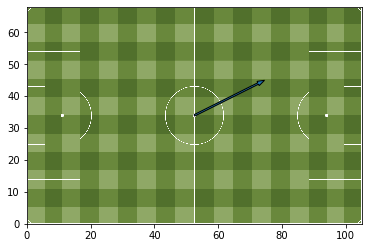

In [64]:
fig, ax = plt.subplots()
ax.imshow(pitch, extent=[0, 105, 0, 68])
plt.arrow(x=52.5, y=34, dx=20, dy=10, width=0.5)

**3.7 VIZ PREP** - create 2x new columns in the `pass_df` object called `dx` and `dy` that are the calculated as the `end_x` column minus the `start_x` column, and the `end_y` column minus the `start_y` solumn respectively
```
pass_df["dx"] = pass_df["end_x"] - pass_df["start_x"]
pass_df["dy"] = pass_df["end_y"] - pass_df["start_y"]
```

In [65]:
pass_df["dx"] = pass_df["end_x"] - pass_df["start_x"]
pass_df["dy"] = pass_df["end_y"] - pass_df["start_y"]

**3.8 VIZ PREP** - check the `pass_df` again for these new columns
```
pass_df.head()
```

In [66]:
pass_df.head()

,player1_team,event,start_x,start_y,end_x,end_y,dx,dy
1,man_u,completed_pass,52.5,34.0,55.8,31.3,3.3,-2.7
2,man_u,completed_pass,55.8,31.3,65.6,33.4,9.8,2.1
3,man_u,completed_pass,65.6,33.4,72.2,55.2,6.6,21.8
8,arsenal,completed_pass,37.6,40.0,28.8,18.3,-8.8,-21.7
17,arsenal,completed_pass,57.6,7.6,56.1,10.2,-1.5,2.6


**3.9 VIZ PREP** - create a cut of the `pass_df` that contains only Man U's passes by filtering the dataframe for the condition that `player1_team` is equal to `"man_u"`. Assign this to a variable called `MU_df`
```
MU_df = pass_df[ pass_df["player1_team"] == "man_u"]
```

In [67]:
MU_df = pass_df[ pass_df["player1_team"] == "man_u"]

**3.10 VIZ PREP** - check `MU_df`
```
MU_df.head()
```

In [68]:
MU_df.head()

,player1_team,event,start_x,start_y,end_x,end_y,dx,dy
1,man_u,completed_pass,52.5,34.0,55.8,31.3,3.3,-2.7
2,man_u,completed_pass,55.8,31.3,65.6,33.4,9.8,2.1
3,man_u,completed_pass,65.6,33.4,72.2,55.2,6.6,21.8
33,man_u,completed_pass,70.7,6.2,73.6,14.9,2.9,8.7
34,man_u,completed_pass,73.6,14.9,62.1,24.4,-11.5,9.5


**3.11 VIZ PREP** - create a cut of the `pass_df` that contains only Arsenal's passes by filtering the dataframe for the condition that `player1_team` is equal to `"arsenal"`. Assign this to a variable called `ARS_df`
```
ARS_df = pass_df[pass_df["player1_team"] == "arsenal"]
```

In [69]:
ARS_df = pass_df[pass_df["player1_team"] == "arsenal"]

**3.12 VIZ PREP** - check `ARS_df`
```
ARS_df.head()
```

In [70]:
ARS_df.head()

,player1_team,event,start_x,start_y,end_x,end_y,dx,dy
8,arsenal,completed_pass,37.6,40.0,28.8,18.3,-8.8,-21.7
17,arsenal,completed_pass,57.6,7.6,56.1,10.2,-1.5,2.6
18,arsenal,completed_pass,56.1,10.2,47.6,35.7,-8.5,25.5
20,arsenal,completed_pass,48.7,37.7,67.9,66.2,19.2,28.5
21,arsenal,completed_pass,67.9,66.2,62.5,62.1,-5.4,-4.1


**3.13 VIZ** - use the `matplotlib` plotting library again to make a Pass Map for Man U using the `MU_df` and the `iterrows()` function to automatically plot each Man U pass as an arrow
```
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="dodgerblue", head_width=1, overhang=1)
```

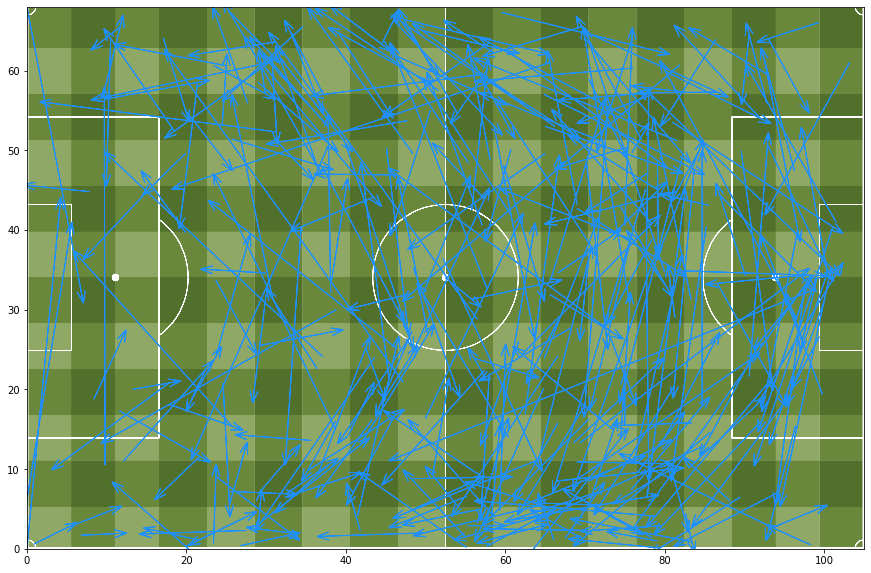

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="dodgerblue", head_width=1, overhang=1)

**3.14 VIZ** - create a Pass Map showing both Man U and Arsenal's completed passes by copying the code in `3.13`, then adding a copy of the code that plots Man U's passes as arrows but calling this `iterrows()` function on `ARS_df`  

```
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="dodgerblue", head_width=1, overhang=1)
    
for index, row in ARS_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="peru", head_width=1, overhang=1)

```
Extra options:    
-plt.tight_layout()    
-head_length = 1, linewidth=2    
-plt.savefig("team_passes.png")

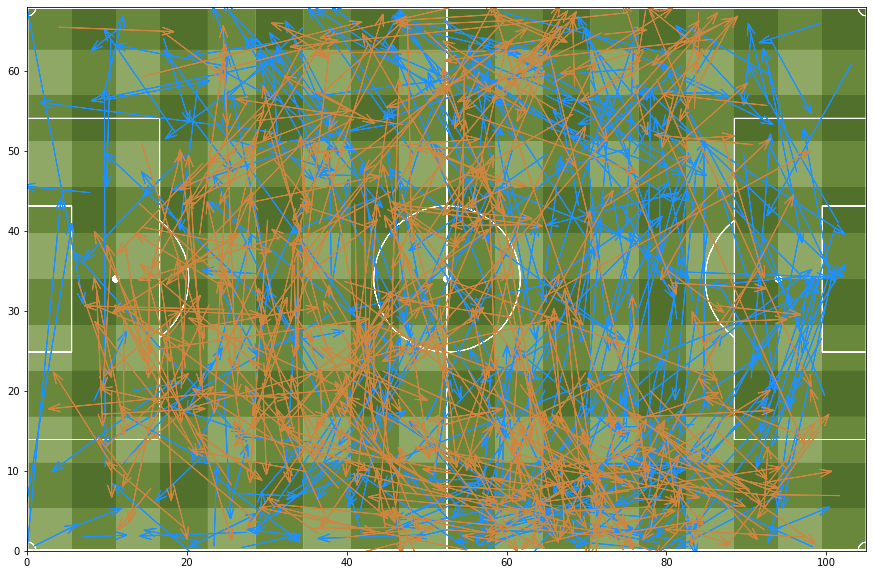

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="dodgerblue", head_width=1, overhang=1)
    
for index, row in ARS_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="peru", head_width=1, overhang=1)

---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_